In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_parquet("../data/data.parquet")

In [3]:
data

,date,D_12,D_24,D_36,D_48,D,type,sum,internals_0,internals_1,internals_2,internals_3,internals_4,app_info_0,app_info_1,app_info_2,app_info_3,app_info_4,app_info_6,app_info_7,app_info_8,app_info_9,app_info_10,e_req_vars_0,e_req_vars_1,e_req_vars_2,e_req_vars_3,e_req_vars_4,e_req_vars_5,e_req_vars_6,e_req_vars_7,e_req_vars_8,e_req_vars_9,e_req_vars_10,e_req_vars_11,e_req_vars_12,e_req_vars_13,e_req_vars_14,e_req_vars_15,e_req_vars_16,e_req_vars_17,e_req_vars_18,e_req_vars_19,e_req_vars_20,e_req_vars_21,e_req_vars_22,e_req_vars_23,e_req_vars_24,e_req_vars_25,e_req_vars_26,e_req_vars_27,e_req_vars_28,e_req_vars_29,e_req_vars_30,e_req_vars_31,e_req_vars_32,e_req_vars_33,e_req_vars_34,e_req_vars_35,e_req_vars_36,e_req_vars_37,e_req_vars_38,e_req_vars_39,e_req_vars_40,e_req_vars_41,e_req_vars_42,e_req_vars_43,e_req_vars_44,e_req_vars_45,e_req_vars_46,e_req_vars_47,e_req_vars_48,e_req_vars_49,e_req_vars_50,e_req_vars_51,e_req_vars_52,e_req_vars_53,e_req_vars_54,e_req_vars_55,e_req_vars_56,e_req_vars_57,e_req_vars_58,e_req_vars_59,e_req_vars_60,e_req_vars_61,e_req_vars_62,e_req_vars_63,e_req_vars_64,e_req_vars_65,e_req_vars_66,e_req_vars_67,e_req_vars_68,e_req_vars_69,e_req_vars_70,e_req_vars_71,e_req_vars_72,e_req_vars_73,e_req_vars_74,e_req_vars_75,e_req_vars_76,e_req_vars_77,e_req_vars_78,e_req_vars_79,e_req_vars_80,e_req_vars_81,e_req_vars_82,e_req_vars_83,e_ch_vars_0,e_ch_vars_1,e_ch_vars_2,e_ch_vars_3,e_ch_vars_4,e_ch_vars_5,e_ch_vars_6,e_ch_vars_7,e_ch_vars_8,e_ch_vars_9,e_ch_vars_10,e_ch_vars_11,e_ch_vars_12,e_ch_vars_13,e_ch_vars_14,e_ch_vars_15,e_ch_vars_16,e_ch_vars_17,e_ch_vars_18,e_ch_vars_19,e_ch_vars_20,e_ch_vars_21,e_ch_vars_22,e_ch_vars_23,e_ch_vars_24,e_ch_vars_25,e_ch_vars_26,e_ch_vars_27,e_ch_vars_28,e_ch_vars_29,e_ch_vars_30,e_ch_vars_31,e_ch_vars_32,e_ch_vars_33,e_ch_vars_34,e_ch_vars_35,e_ch_vars_36,e_ch_vars_37,e_ch_vars_38,e_ch_vars_39,e_ch_vars_40,e_ch_vars_41,e_ch_vars_42,e_ch_vars_43,e_ch_vars_44,e_ch_vars_45,e_ch_vars_46,e_ch_vars_47,e_ch_vars_48,e_ch_vars_49,e_ch_vars_50,e_ch_vars_51,e_ch_vars_52,e_ch_vars_53,e_ch_vars_54,e_ch_vars_55,e_ch_vars_56,e_ch_vars_57,e_ch_vars_58,e_ch_vars_59,e_ch_vars_60,e_ch_vars_61,e_ch_vars_62,e_ch_vars_63,e_ch_vars_64,e_ch_vars_65,e_ch_vars_66,e_ch_vars_67,e_ch_vars_68,e_ch_vars_69,e_ch_vars_70,e_ch_vars_71,e_ch_vars_72,e_ch_vars_73,e_ch_vars_74,e_ch_vars_75,e_ch_vars_76,e_ch_vars_77,e_ch_vars_78,e_ch_vars_79,e_ch_vars_80,e_ch_vars_81,e_ch_vars_82,e_ch_vars_83,e_ch_vars_84,e_ch_vars_85,e_ch_vars_86,e_ch_vars_87,e_ch_vars_88,e_ch_vars_89,e_ch_vars_90,e_ch_vars_91,e_ch_vars_92,e_ch_vars_93,e_ch_vars_94,e_ch_vars_95,e_ch_vars_96,e_ch_vars_97,e_ch_vars_98,e_ch_vars_99,e_ch_vars_100,e_ch_vars_101,e_ch_vars_102,e_ch_vars_103,e_ch_vars_104,e_ch_vars_105,e_ch_vars_106,e_ch_vars_107,e_ch_vars_108,e_ch_vars_109,e_ch_vars_110,e_ch_vars_111,e_ch_vars_112,e_ch_vars_113,e_ch_vars_114,e_ch_vars_115,e_ch_vars_116,e_ch_vars_117,e_ch_vars_118,e_ch_vars_119,e_ch_vars_120,e_ch_vars_121,e_ch_vars_122,e_ch_vars_123,e_ch_vars_124,e_ch_vars_125,e_ch_vars_126,e_ch_vars_127,e_ch_vars_128,e_ch_vars_129,e_ch_vars_130,e_ch_vars_131,e_req_vars_84,e_req_vars_85,e_req_vars_86,e_req_vars_87,e_ch_vars_132
0,2022-06,0,0,0,0,0,0,600000.00,0,NaN,NaN,NaN,NaN,0.0,10.0,1.0,0.0,0.0,3.0,60000.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
target_cols = ['D_12', 'D_24', 'D_36', 'D_48', 'D']
target_cols_used = ['D_24', 'D_36']
cat_cols = ['type']
date_cols = ['date']
num_cols = data.drop(columns=target_cols+cat_cols+date_cols).columns

## Анализ таргета

In [5]:
def plot_distribution(df, title='Распределение переменной', log=1, rot=0):
    plt.figure(figsize=(6, 6))
    df.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(title)
    plt.xlabel('Значение переменной')
    plt.ylabel('Количество наблюдений (log)')
    plt.xticks(rotation=rot)
    if log:
        plt.yscale('log')
    plt.show()


def plot_vals_by_time(df, date_col, grp_trg_col, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(df[date_col], df[grp_trg_col], marker='o', linestyle='-', color='b')
    plt.title('Распределение во времени')
    plt.xlabel('Дата')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

Статистика по D_24:


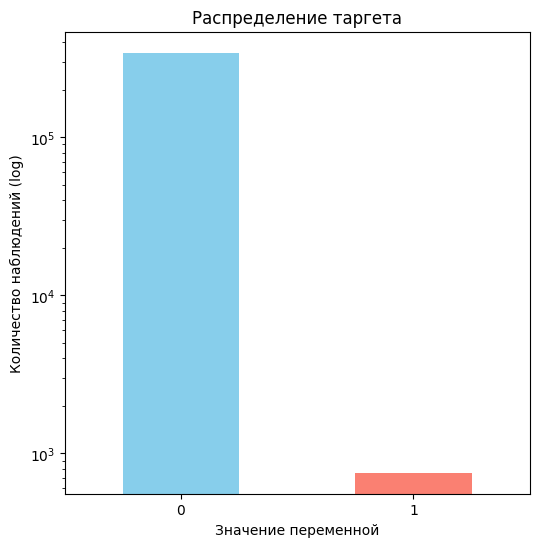

Класс 0: 342645 примеров (99.78%)
Класс 1: 754 примеров (0.22%)



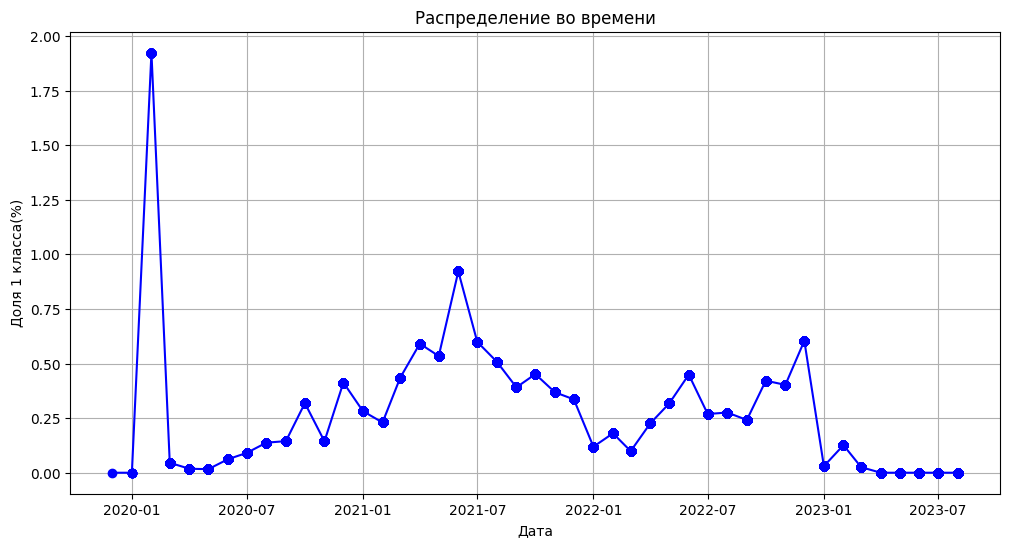

Статистика по D_36:


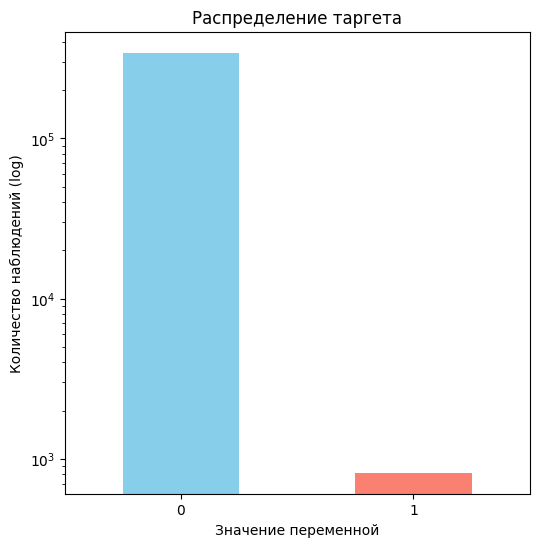

Класс 0: 342581 примеров (99.76%)
Класс 1: 818 примеров (0.24%)



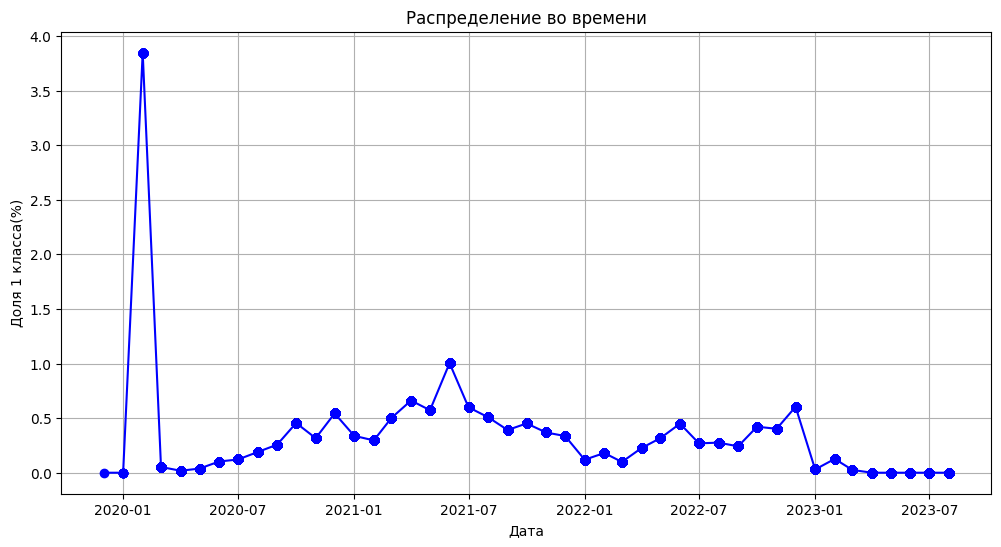

In [6]:
date_col = 'date'
data[date_col] = pd.to_datetime(data[date_col])

for trg in target_cols_used:
    print(f'Статистика по {trg}:')
    
    class_counts = data[trg].value_counts()
    total_samples = len(data)
    plot_distribution(class_counts, title='Распределение таргета')
    print(f'Класс 0: {class_counts[0]} примеров ({class_counts[0]/total_samples*100:.2f}%)')
    print(f'Класс 1: {class_counts[1]} примеров ({class_counts[1]/total_samples*100:.2f}%)\n')

    data = data.sort_values(by=date_col)
    data['percentage_class_1'] = data.groupby(date_col)[trg].transform(lambda x: x.mean() * 100)
    plot_vals_by_time(data, date_col, ['percentage_class_1'], 'Доля 1 класса(%)')

## Анализ признаков

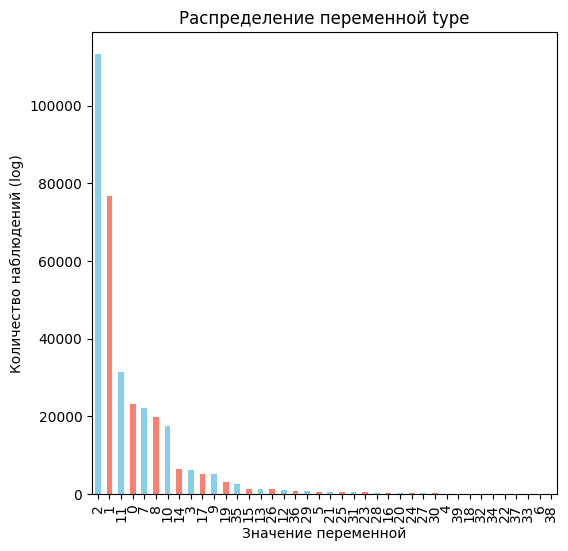

In [7]:
for col in cat_cols:
    value_counts = data[col].value_counts()
    plot_distribution(value_counts, title=f'Распределение переменной {col}', log=0, rot=90)

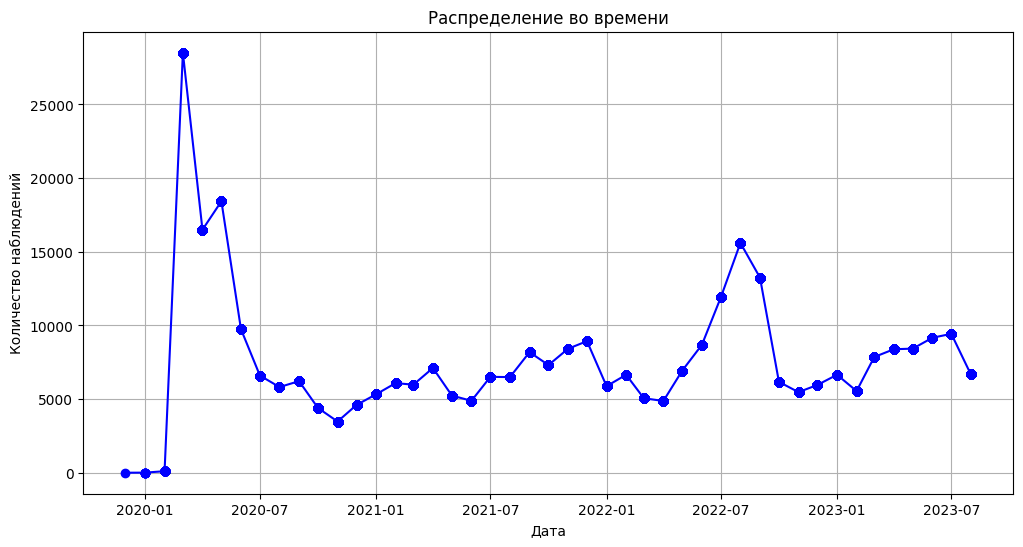

In [8]:
for col in date_cols:
    data = data.sort_values(by=col)
    data['count'] = data.groupby(col)[trg].transform(lambda x: x.count())
    plot_vals_by_time(data, col, ['count'], 'Количество наблюдений')

Количество численных признаков большое, поэтому для наглядности возьмем только некоторую подвыборку

In [9]:
num_cols_for_analysis = [
    'sum', 'internals_0', 'app_info_0', 'app_info_1', 'app_info_2', 
    'app_info_3', 'app_info_4', 'app_info_6', 'app_info_7', 'app_info_8',
    'app_info_9', 'app_info_10'
]

# При необходимости можно раскомментировать строку ниже и посмотреть статистики для всех признаков
# num_cols_for_analysis = num_cols

In [10]:
for col in num_cols_for_analysis:
    nan_percent = data[col].isna().sum() / data.shape[0]
    print(f"Доля пропусков в {col}: {round(nan_percent, 2)}")

Доля пропусков в sum: 0.0
Доля пропусков в internals_0: 0.0
Доля пропусков в app_info_0: 0.03
Доля пропусков в app_info_1: 0.02
Доля пропусков в app_info_2: 0.03
Доля пропусков в app_info_3: 0.03
Доля пропусков в app_info_4: 0.03
Доля пропусков в app_info_6: 0.03
Доля пропусков в app_info_7: 0.0
Доля пропусков в app_info_8: 0.0
Доля пропусков в app_info_9: 0.0
Доля пропусков в app_info_10: 0.0


In [11]:
data[num_cols_for_analysis].describe()

,sum,internals_0,app_info_0,app_info_1,app_info_2,app_info_3,app_info_4,app_info_6,app_info_7,app_info_8,app_info_9,app_info_10
count,3.433470e+05,343399.000000,3.317840e+05,335508.000000,331784.000000,331784.000000,331784.000000,331784.000000,3.433990e+05,3.433990e+05,3.433990e+05,3.433990e+05
mean,1.229380e+06,0.176320,1.120818e+02,61.154569,2.569518,1.335010,0.286840,1.760658,1.610387e+05,2.775847e+04,1.175298e+04,7.098767e+02
std,1.327287e+06,0.381092,5.134559e+03,226.076506,1.043486,0.987405,0.514202,2.258651,1.970679e+06,1.892508e+06,6.883552e+04,1.841774e+04
min,0.000000e+00,0.000000,-1.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+05,0.000000,0.000000e+00,10.000000,2.000000,1.000000,0.000000,-1.000000,6.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+05,0.000000,3.600000e+01,30.000000,3.000000,1.000000,0.000000,2.000000,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+06,0.000000,1.800000e+02,71.000000,3.000000,2.000000,1.000000,4.000000,1.800000e+05,2.000000e+04,0.000000e+00,0.000000e+00
max,6.000000e+07,1.000000,2.832000e+06,24248.000000,4.000000,4.000000,5.000000,4.000000,1.000000e+09,1.100000e+09,1.000000e+07,5.000000e+06


In [12]:
data[num_cols_for_analysis].info()

<class 'pandas.core.frame.DataFrame'>
Index: 343399 entries, 332124 to 331705
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sum          343347 non-null  float64
 1   internals_0  343399 non-null  int64  
 2   app_info_0   331784 non-null  float64
 3   app_info_1   335508 non-null  float64
 4   app_info_2   331784 non-null  float64
 5   app_info_3   331784 non-null  float64
 6   app_info_4   331784 non-null  float64
 7   app_info_6   331784 non-null  float64
 8   app_info_7   343399 non-null  float64
 9   app_info_8   343399 non-null  float64
 10  app_info_9   343399 non-null  float64
 11  app_info_10  343399 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 34.1 MB


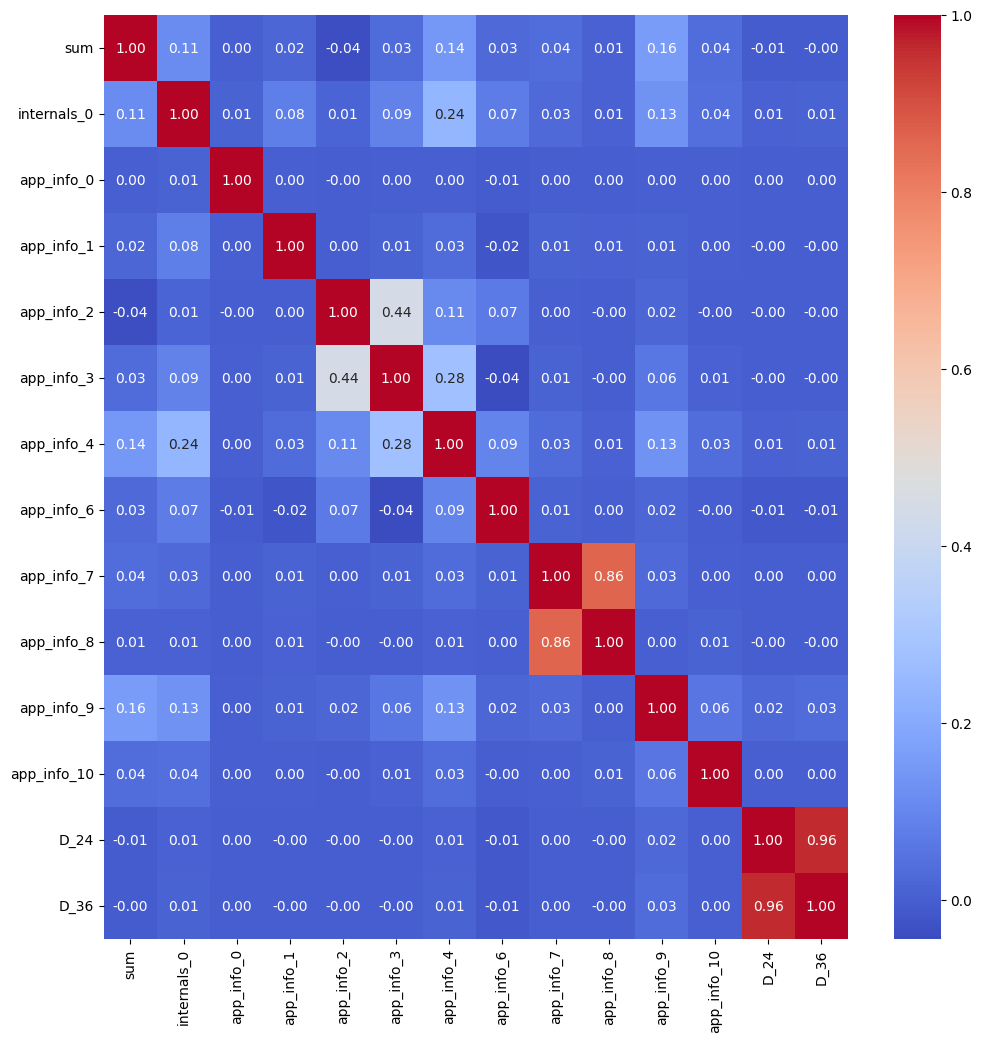

In [13]:
correlation_matrix = data[num_cols_for_analysis+target_cols_used].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [14]:
data[['app_info_7', 'app_info_8']]

,app_info_7,app_info_8
332124,90000.0,200000.0
340115,80000.0,251000.0
331760,100000.0,35000.0
332125,80000.0,600000.0
338827,65000.0,30000.0
...,...,...
334618,85000.0,0.0
334663,60000.0,40000.0
330078,85000.0,0.0
336094,250000.0,0.0


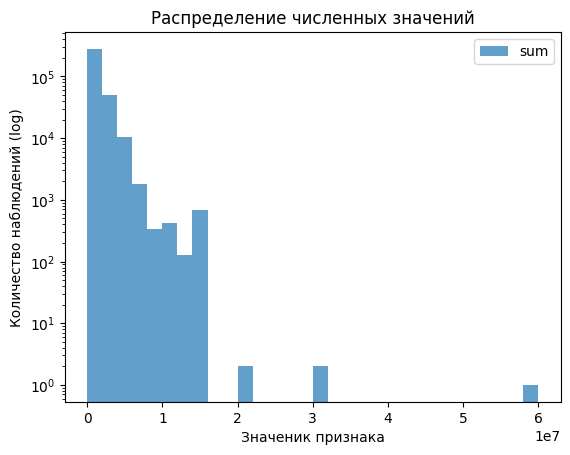

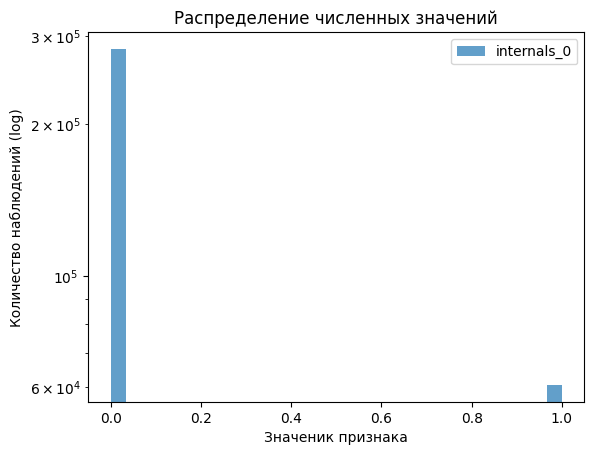

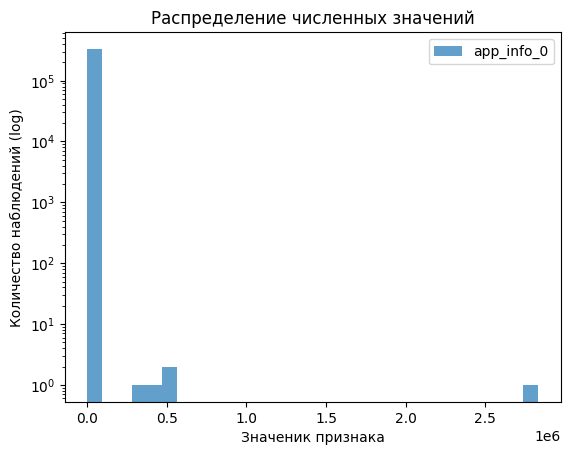

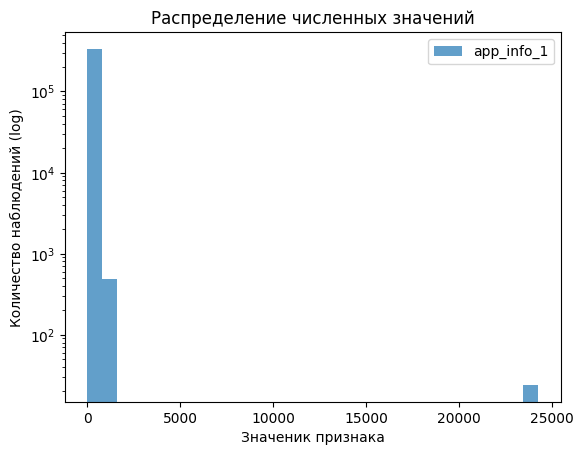

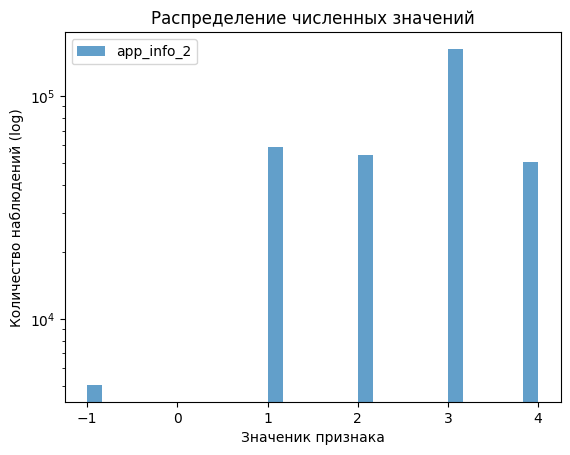

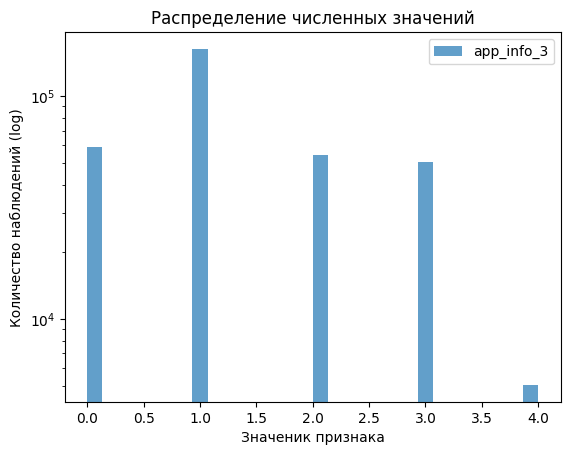

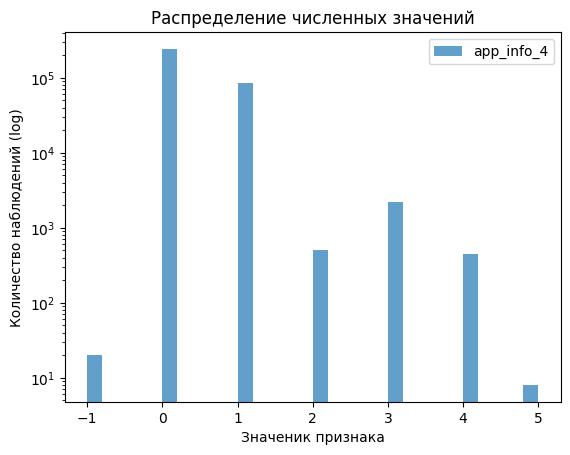

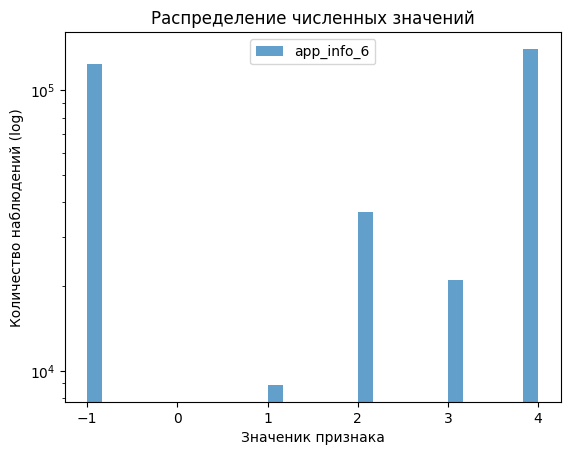

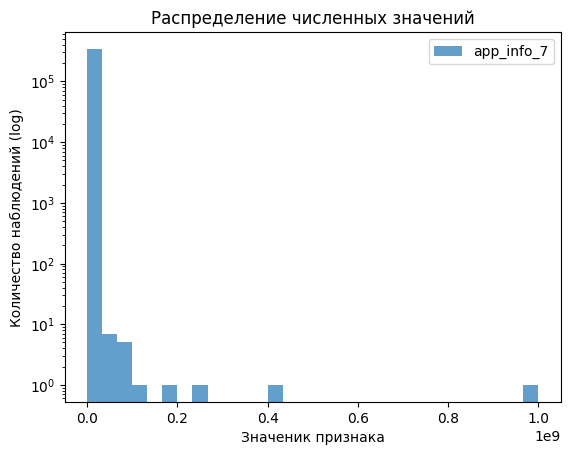

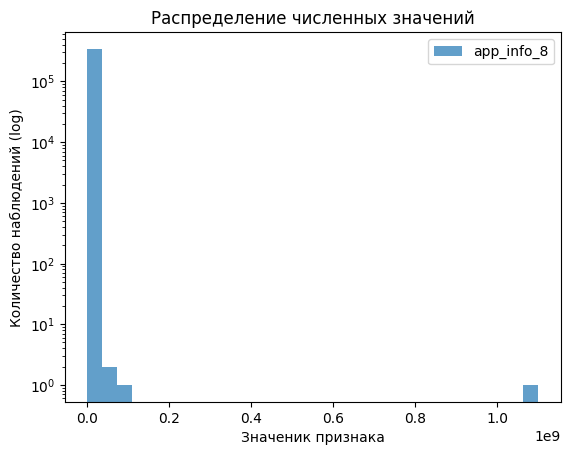

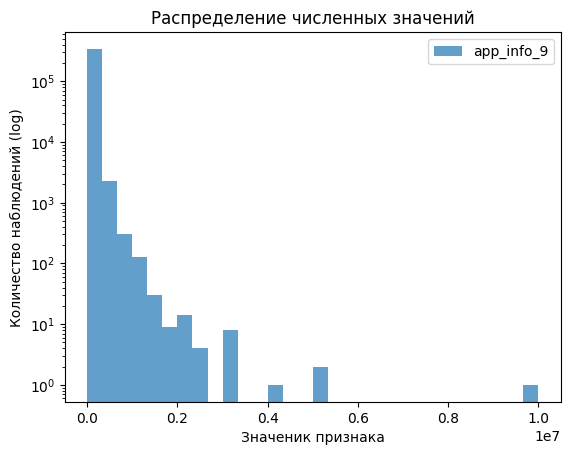

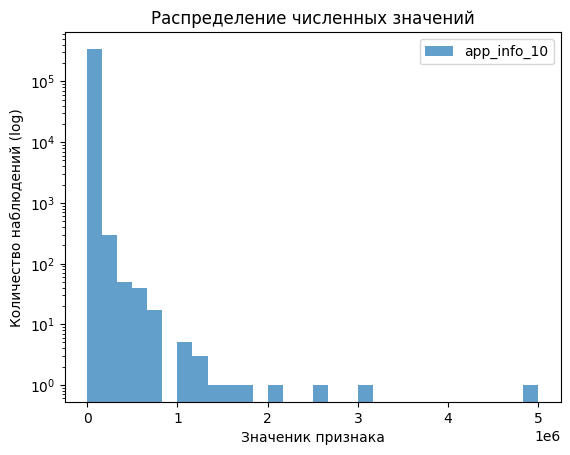

In [15]:
for col in num_cols_for_analysis:
    plt.hist(data[col], bins=30, alpha=0.7, label=col)
    plt.title('Распределение численных значений')
    plt.xlabel('Значеник признака')
    plt.ylabel('Количество наблюдений (log)')
    plt.legend()
    plt.yscale('log')
    plt.show()